In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-exploration-and-modelling-with-r/Rplot001.png
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results__.html
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__output__.json
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/custom.css
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results___files/__results___38_1.png
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results___files/__results___40_0.png
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results___files/__results___28_1.png
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results___files/__results___16_2.png
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results___files/__results___50_4.png
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results___files/__results___30_0.png
/kaggle/input/hr-analytics-exploration-and-modelling-with-r/__results___files/__results___34_1.png
/kaggle/in

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
with open('/kaggle/input/hr-datacsv/HR_comma_sep.csv') as f:
    df =  pd.read_csv(f, usecols=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years'])
f.close()
#df.head()
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.462863             -0.882040   
1            0.752814         0.840707        0.971113              1.220423   
2           -2.022479         0.957554        2.593763              1.420657   
3            0.431041         0.899131        0.971113              0.439508   
4           -0.976716        -1.145699       -1.462863             -0.841993   

   time_spend_company  Work_accident  promotion_last_5years  
0           -0.341235      -0.411165              -0.147412  
1            1.713436      -0.411165              -0.147412  
2            0.343655      -0.411165              -0.147412  
3            1.028546      -0.411165              -0.147412  
4           -0.341235      -0.411165              -0.147412

Text(0, 0.5, 'Inertia')

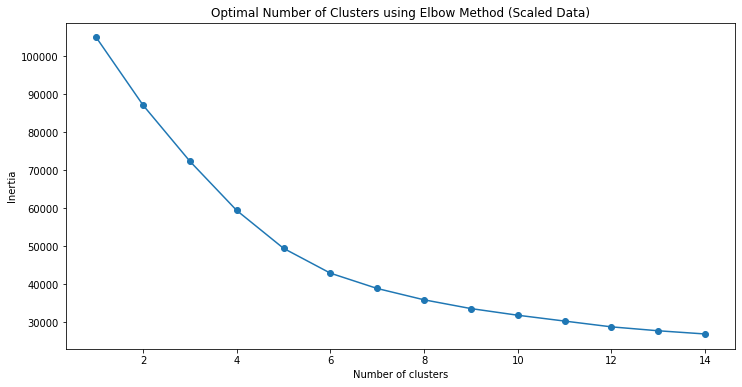

In [4]:
#KMeans on Original Dataset
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [5]:
#From above curve, let's use KMeans using n_clusers=4
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.25793525498931236


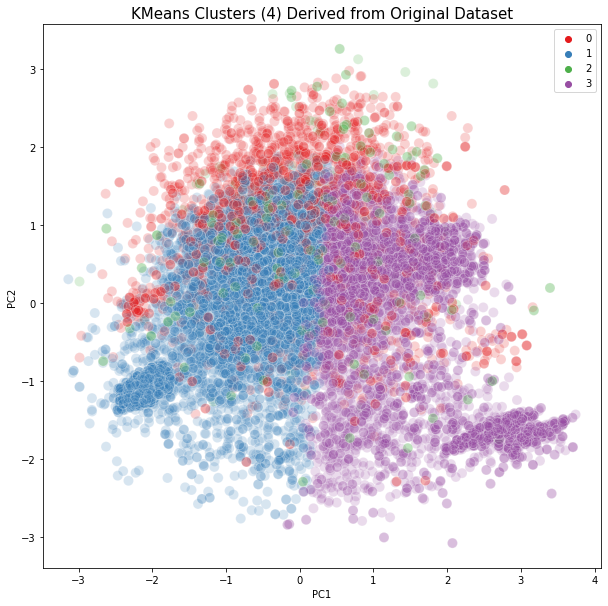

In [6]:
#Now let's use PCA to reduce dataset into 3 principal compenents:
pca2 = PCA(n_components=3).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

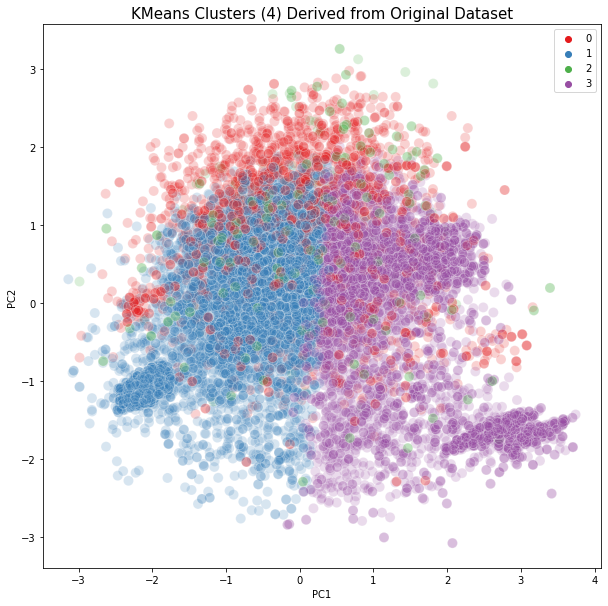

In [7]:
#Now let's use PCA to reduce dataset into 5 principal compenents:
pca2 = PCA(n_components=5).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

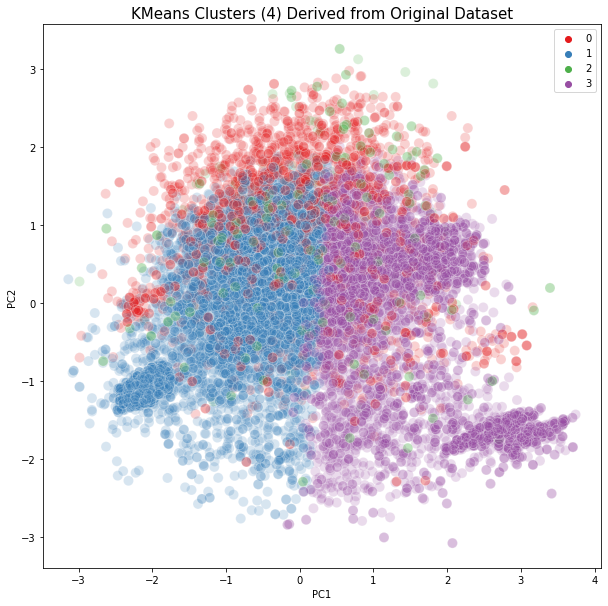

In [8]:
#What about 7:
#Now let's use PCA to reduce dataset into 3 principal compenents:
pca2 = PCA(n_components=7).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

[0.26143604 0.16093156 0.1514701 ]


Text(0, 0.5, 'Inertia')

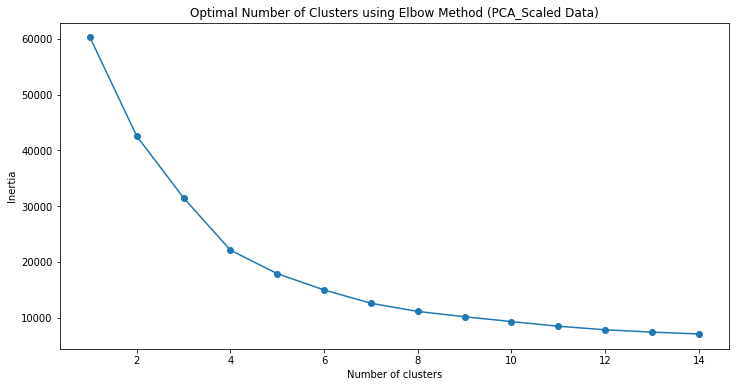

In [9]:
#Did not seem to change much so now using KMeans to PCA principal components:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [10]:
#Was score increased?
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.36551479624049593


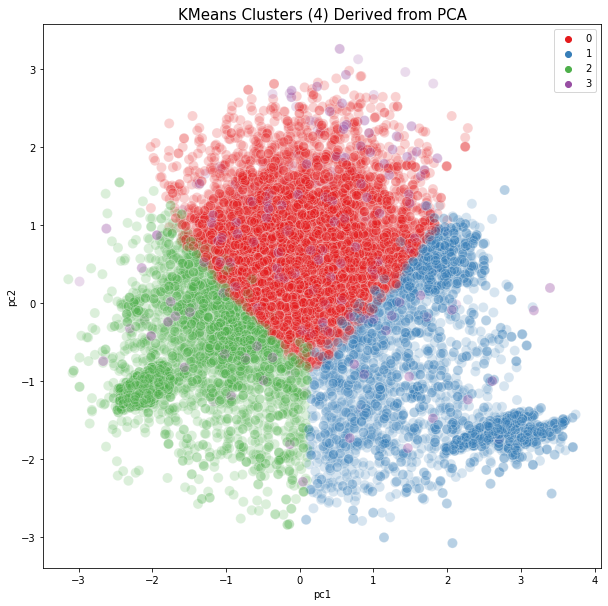

In [11]:
#Plot to see improvement:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 14999 samples in 0.013s...
[t-SNE] Computed neighbors for 14999 samples in 2.596s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14999
[t-SNE] Computed conditional probabilities for sample 2000 / 14999
[t-SNE] Computed conditional probabilities for sample 3000 / 14999
[t-SNE] Computed conditional probabilities for sample 4000 / 14999
[t-SNE] Computed conditional probabilities for sample 5000 / 14999
[t-SNE] Computed conditional probabilities for sample 6000 / 14999
[t-SNE] Computed conditional probabilities for sample 7000 / 14999
[t-SNE] Computed conditional probabilities for sample 8000 / 14999
[t-SNE] Computed conditional probabilities for sample 9000 / 14999
[t-SNE] Computed conditional probabilities for sample 10000 / 14999
[t-SNE] Computed conditional probabilities for sample 11000 / 14999
[t-SNE] Computed conditional probabilities for sample 12000 / 14999
[t-SNE] Computed conditional probabilities for sa

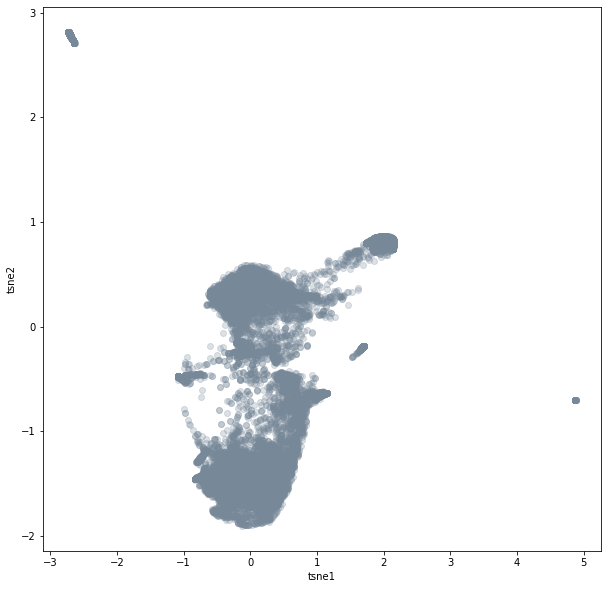

In [12]:
#What about dimension reduction via t-SNE:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=250, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [13]:
#Using KMeans on t-SNE data
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.5380257368087769


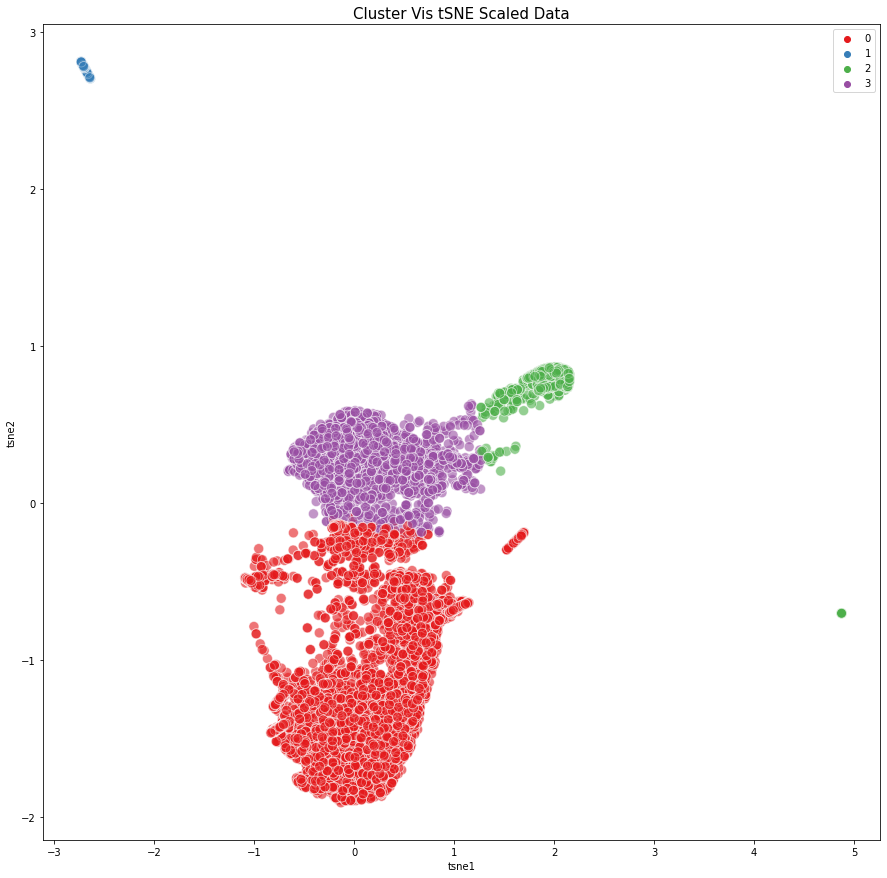

In [14]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

Due to limited CPU cycle, even n_init=1000 I was not able to finish. With more CPU maybe t-SNE will give more separeated clusters. Next let's try DBSCAN method.

In [15]:
#Let's now apply the DBSCAN on both the PCA reduced datasets to see which clustering methods give better separation:

dbscan_pca_scale = DBSCAN(eps=1, min_samples=1, metric="euclidean").fit(pca_df_scale)
print('DBSCAN PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, dbscan_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = dbscan_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

DBSCAN PCA Scaled Silhouette Score: 0.4113605288255727


The DBSCAN yield a better silhouette score, but let's plot to see if DBSCAN did a better cluster separation

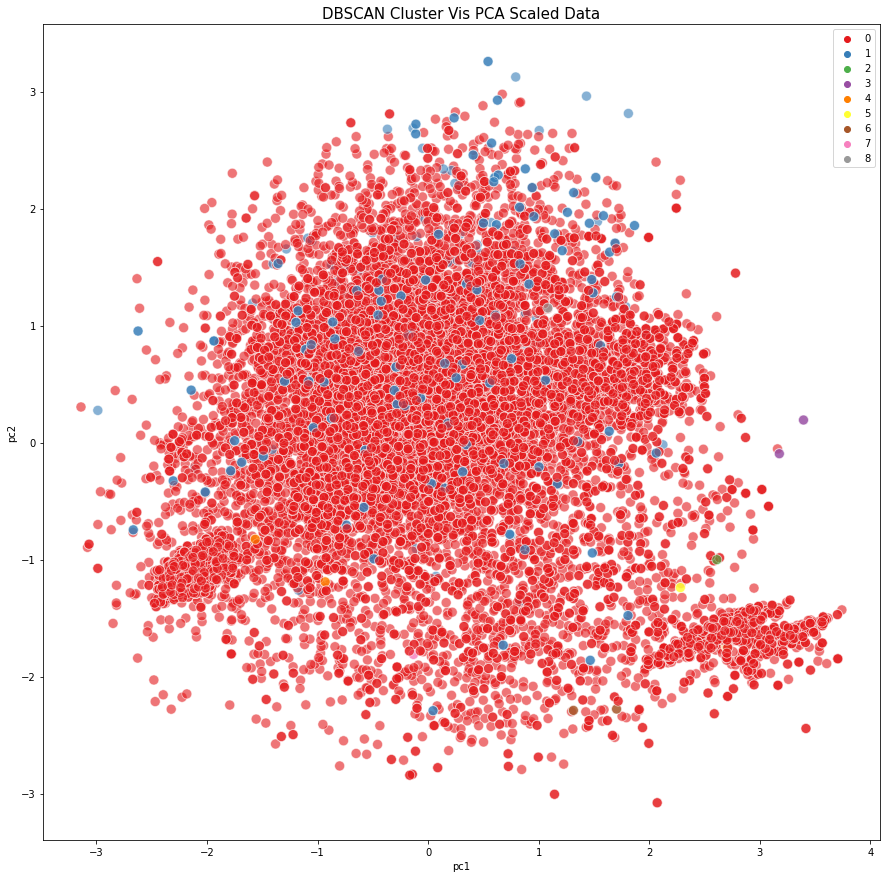

In [16]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1],hue=labels_pca_scale, palette='Set1', s=100, alpha=0.6).set_title('DBSCAN Cluster Vis PCA Scaled Data', fontsize=15)
plt.legend()
plt.show()

Turns out DBSCAN cluster method did not do a good job at cluster separations. So a higher silhouette score does not necessary mean a appropriate cluster model for the dataset.

Lesson learned via this challegne: During unsupervised learning, data scienests need to really understand the data and tune both dimention reduction and clustering methods to find the best solution.